In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

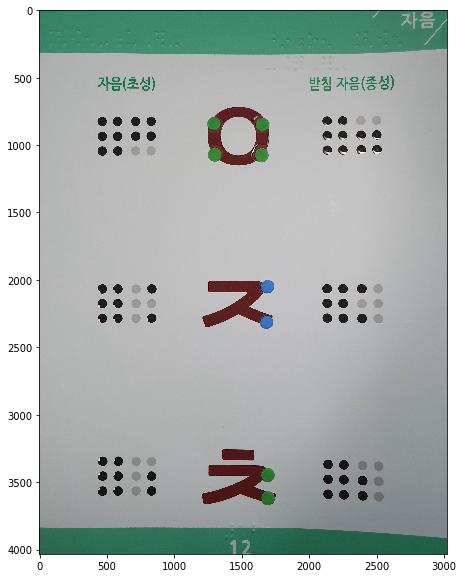

In [2]:
img1_ori = cv2.imread('3.jpg')
height, width, channel = img1_ori.shape

plt.figure(figsize=(12,10))
plt.imshow(img1_ori,cmap = 'gray')

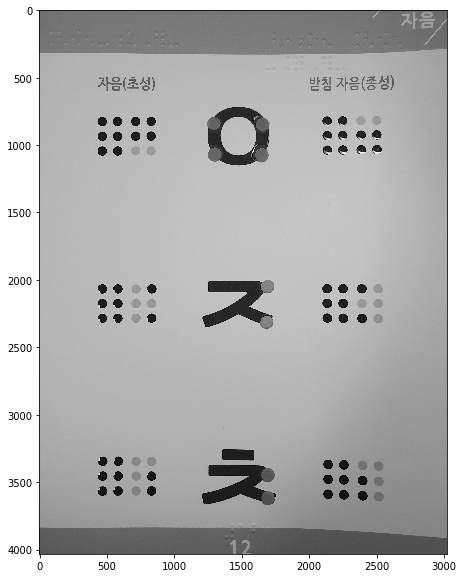

In [3]:
img1_gray = cv2.cvtColor(img1_ori, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12,10))
plt.imshow(img1_gray,cmap='gray')

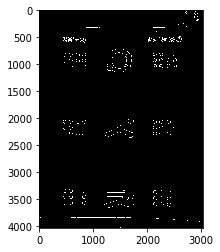

In [4]:
img1_blurred = cv2.GaussianBlur(img1_gray,ksize=(5,5),sigmaX=0)

img1_adaptivethreshold = cv2.adaptiveThreshold(
    img1_blurred,
    maxValue=255.0,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType = cv2.THRESH_BINARY_INV,
    blockSize=19,
    C=9
)

plt.imshow(img1_adaptivethreshold,cmap='gray')

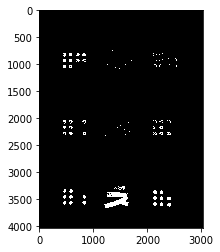

In [5]:
ret, img1_binary = cv2.threshold(img1_blurred, 30, 255, cv2.THRESH_BINARY_INV)

plt.imshow(img1_binary,cmap='gray')

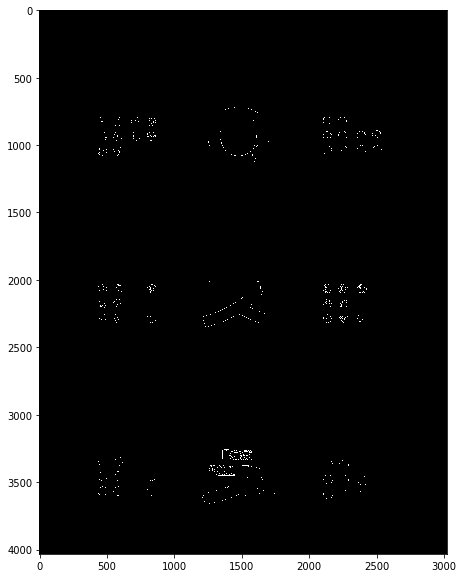

In [6]:
img1_contours, _ = cv2.findContours(
    img1_binary,
    mode = cv2.RETR_LIST,
    method = cv2.CHAIN_APPROX_SIMPLE
)

img1_temp_result = np.zeros((height, width, channel), dtype = np.uint8)

cv2.drawContours(img1_temp_result, contours = img1_contours, contourIdx=-1, color=(255,255,255))

plt.figure(figsize=(12,10))
plt.imshow(img1_temp_result)

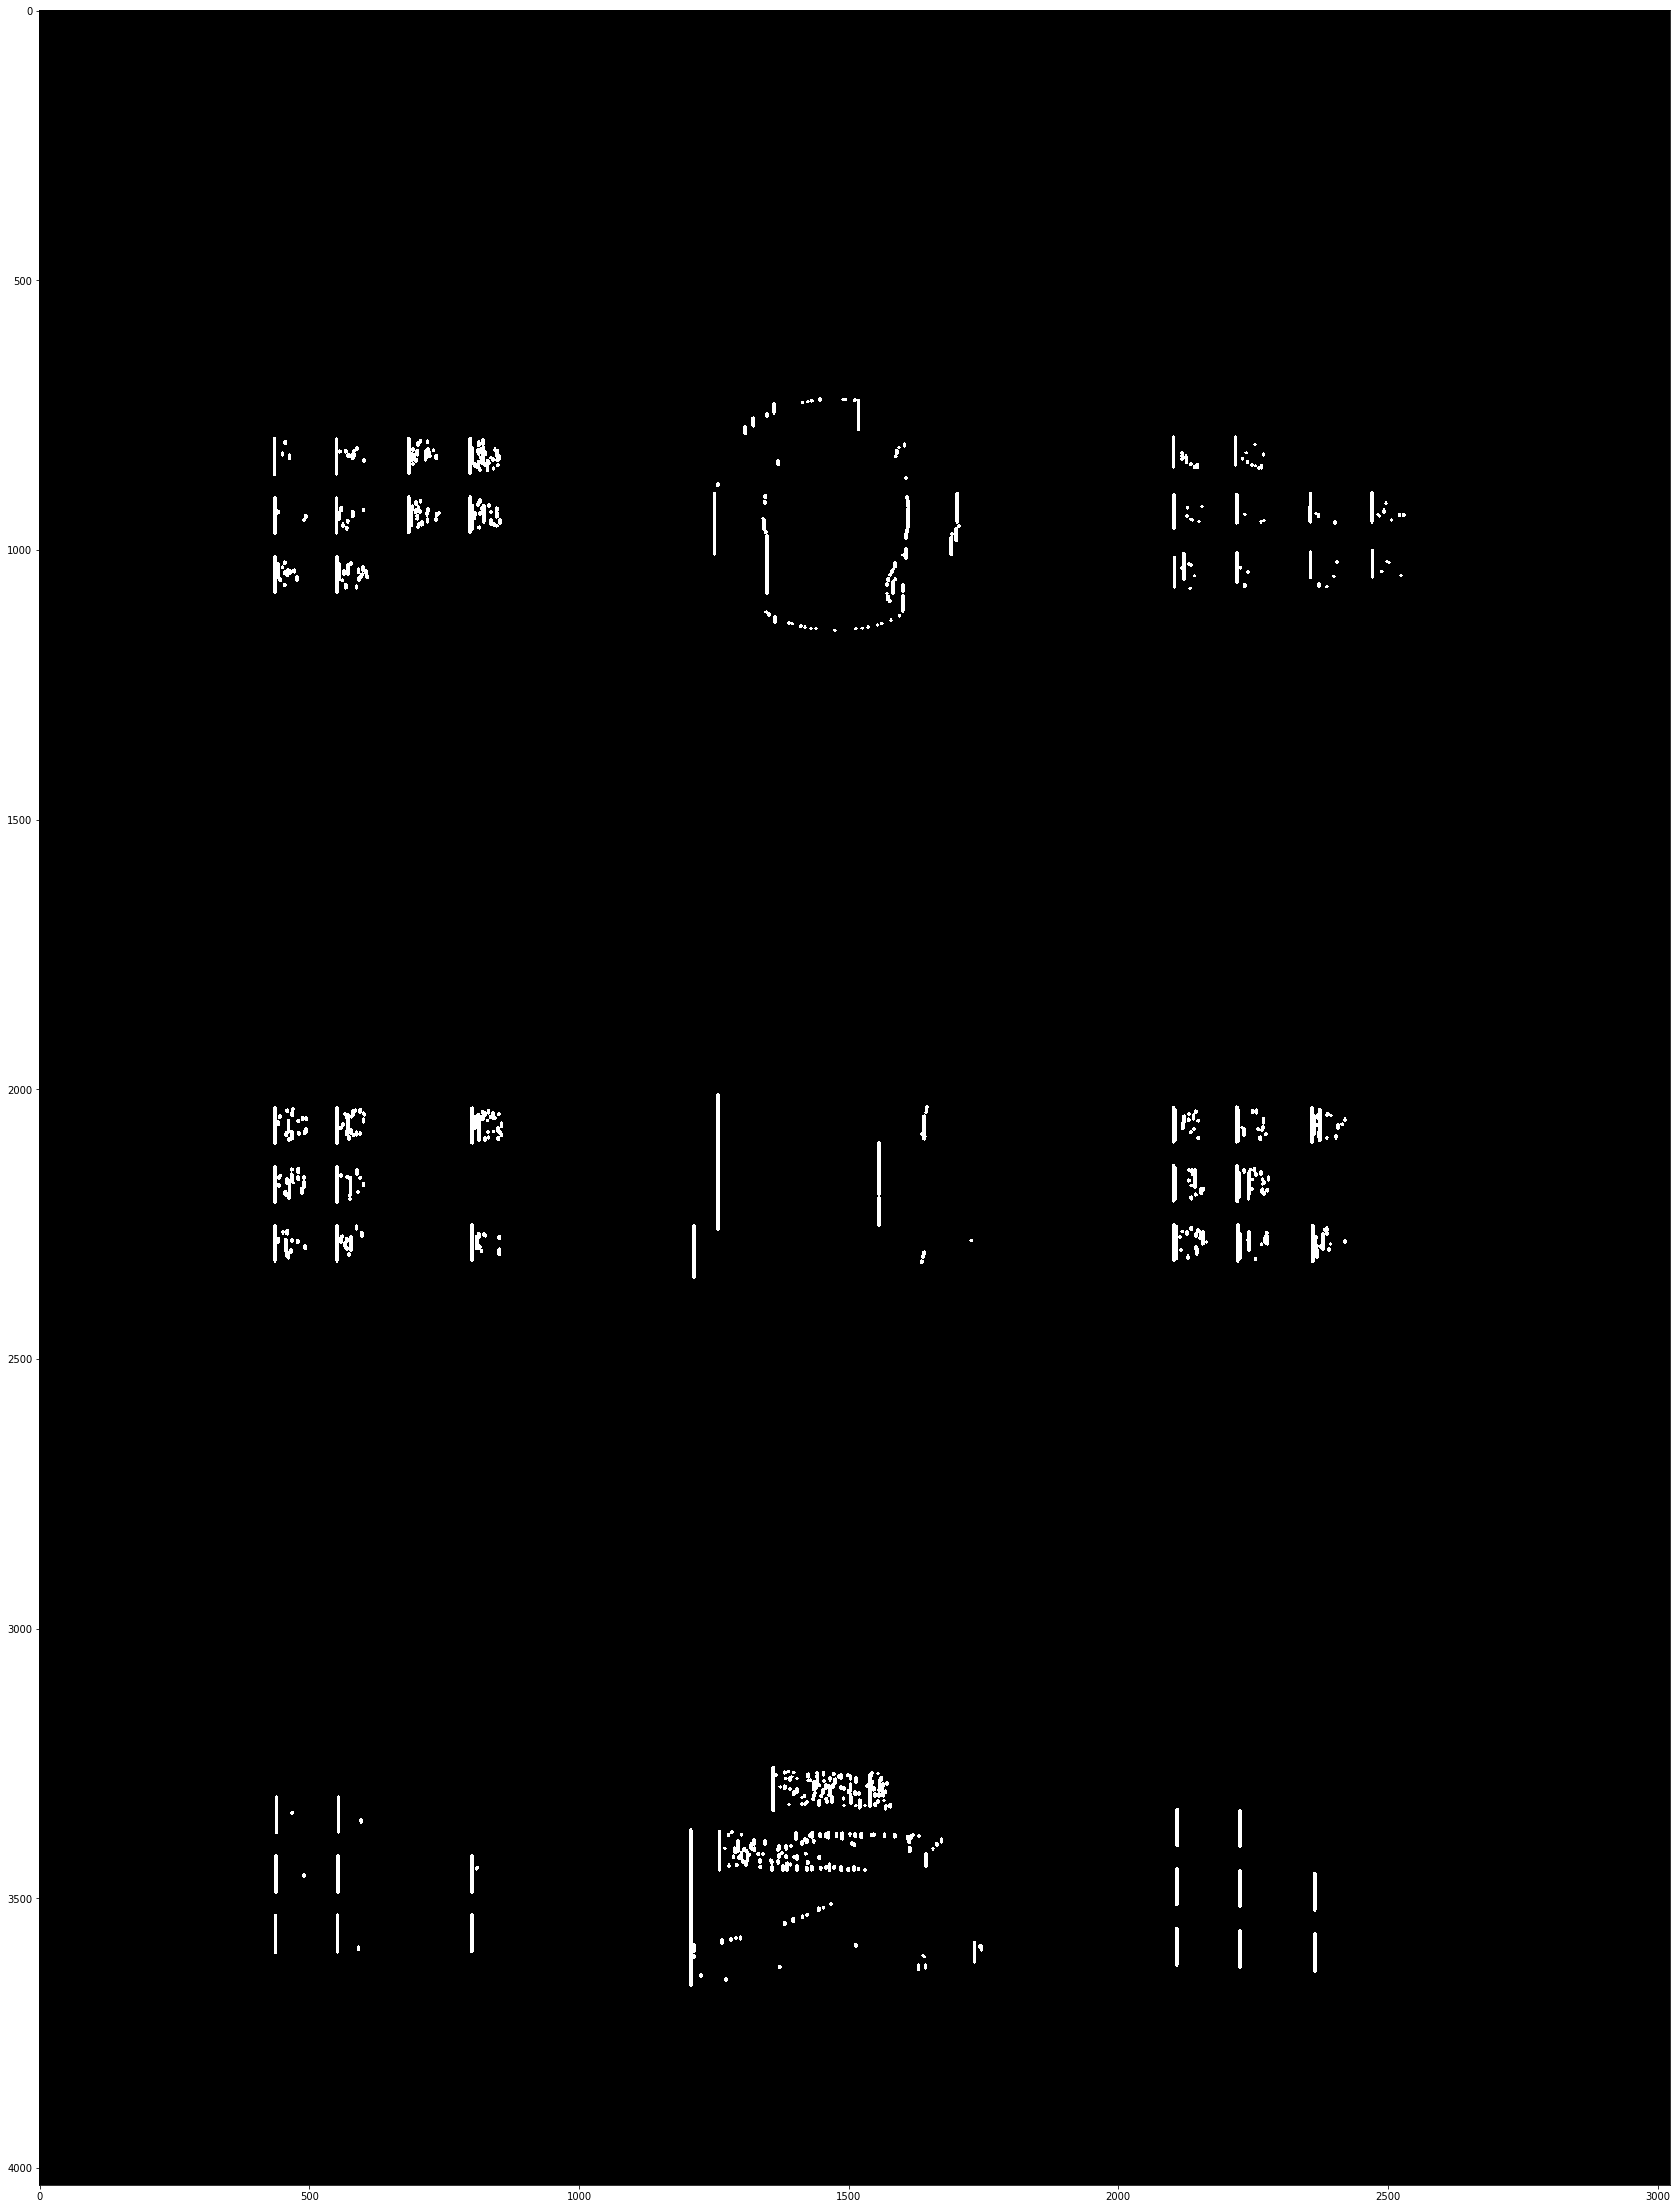

In [7]:
img1_temp_result = np.zeros((height,width,channel), dtype = np.uint8)

img1_contours_dict = []

for contour in img1_contours:
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(img1_temp_result, pt1=(x,y), pt2 = (x+2, y+h), color = (255,255,255), thickness=4)
    
    img1_contours_dict.append({
        'contour':contour,
        'x':x,
        'y':y,
        'w':w,
        'h':h,
        'cx':x+(w/2),
        'cy':y+(h/2)     
    })

plt.figure(figsize=(48,40))
plt.imshow(img1_temp_result,cmap='gray')

True

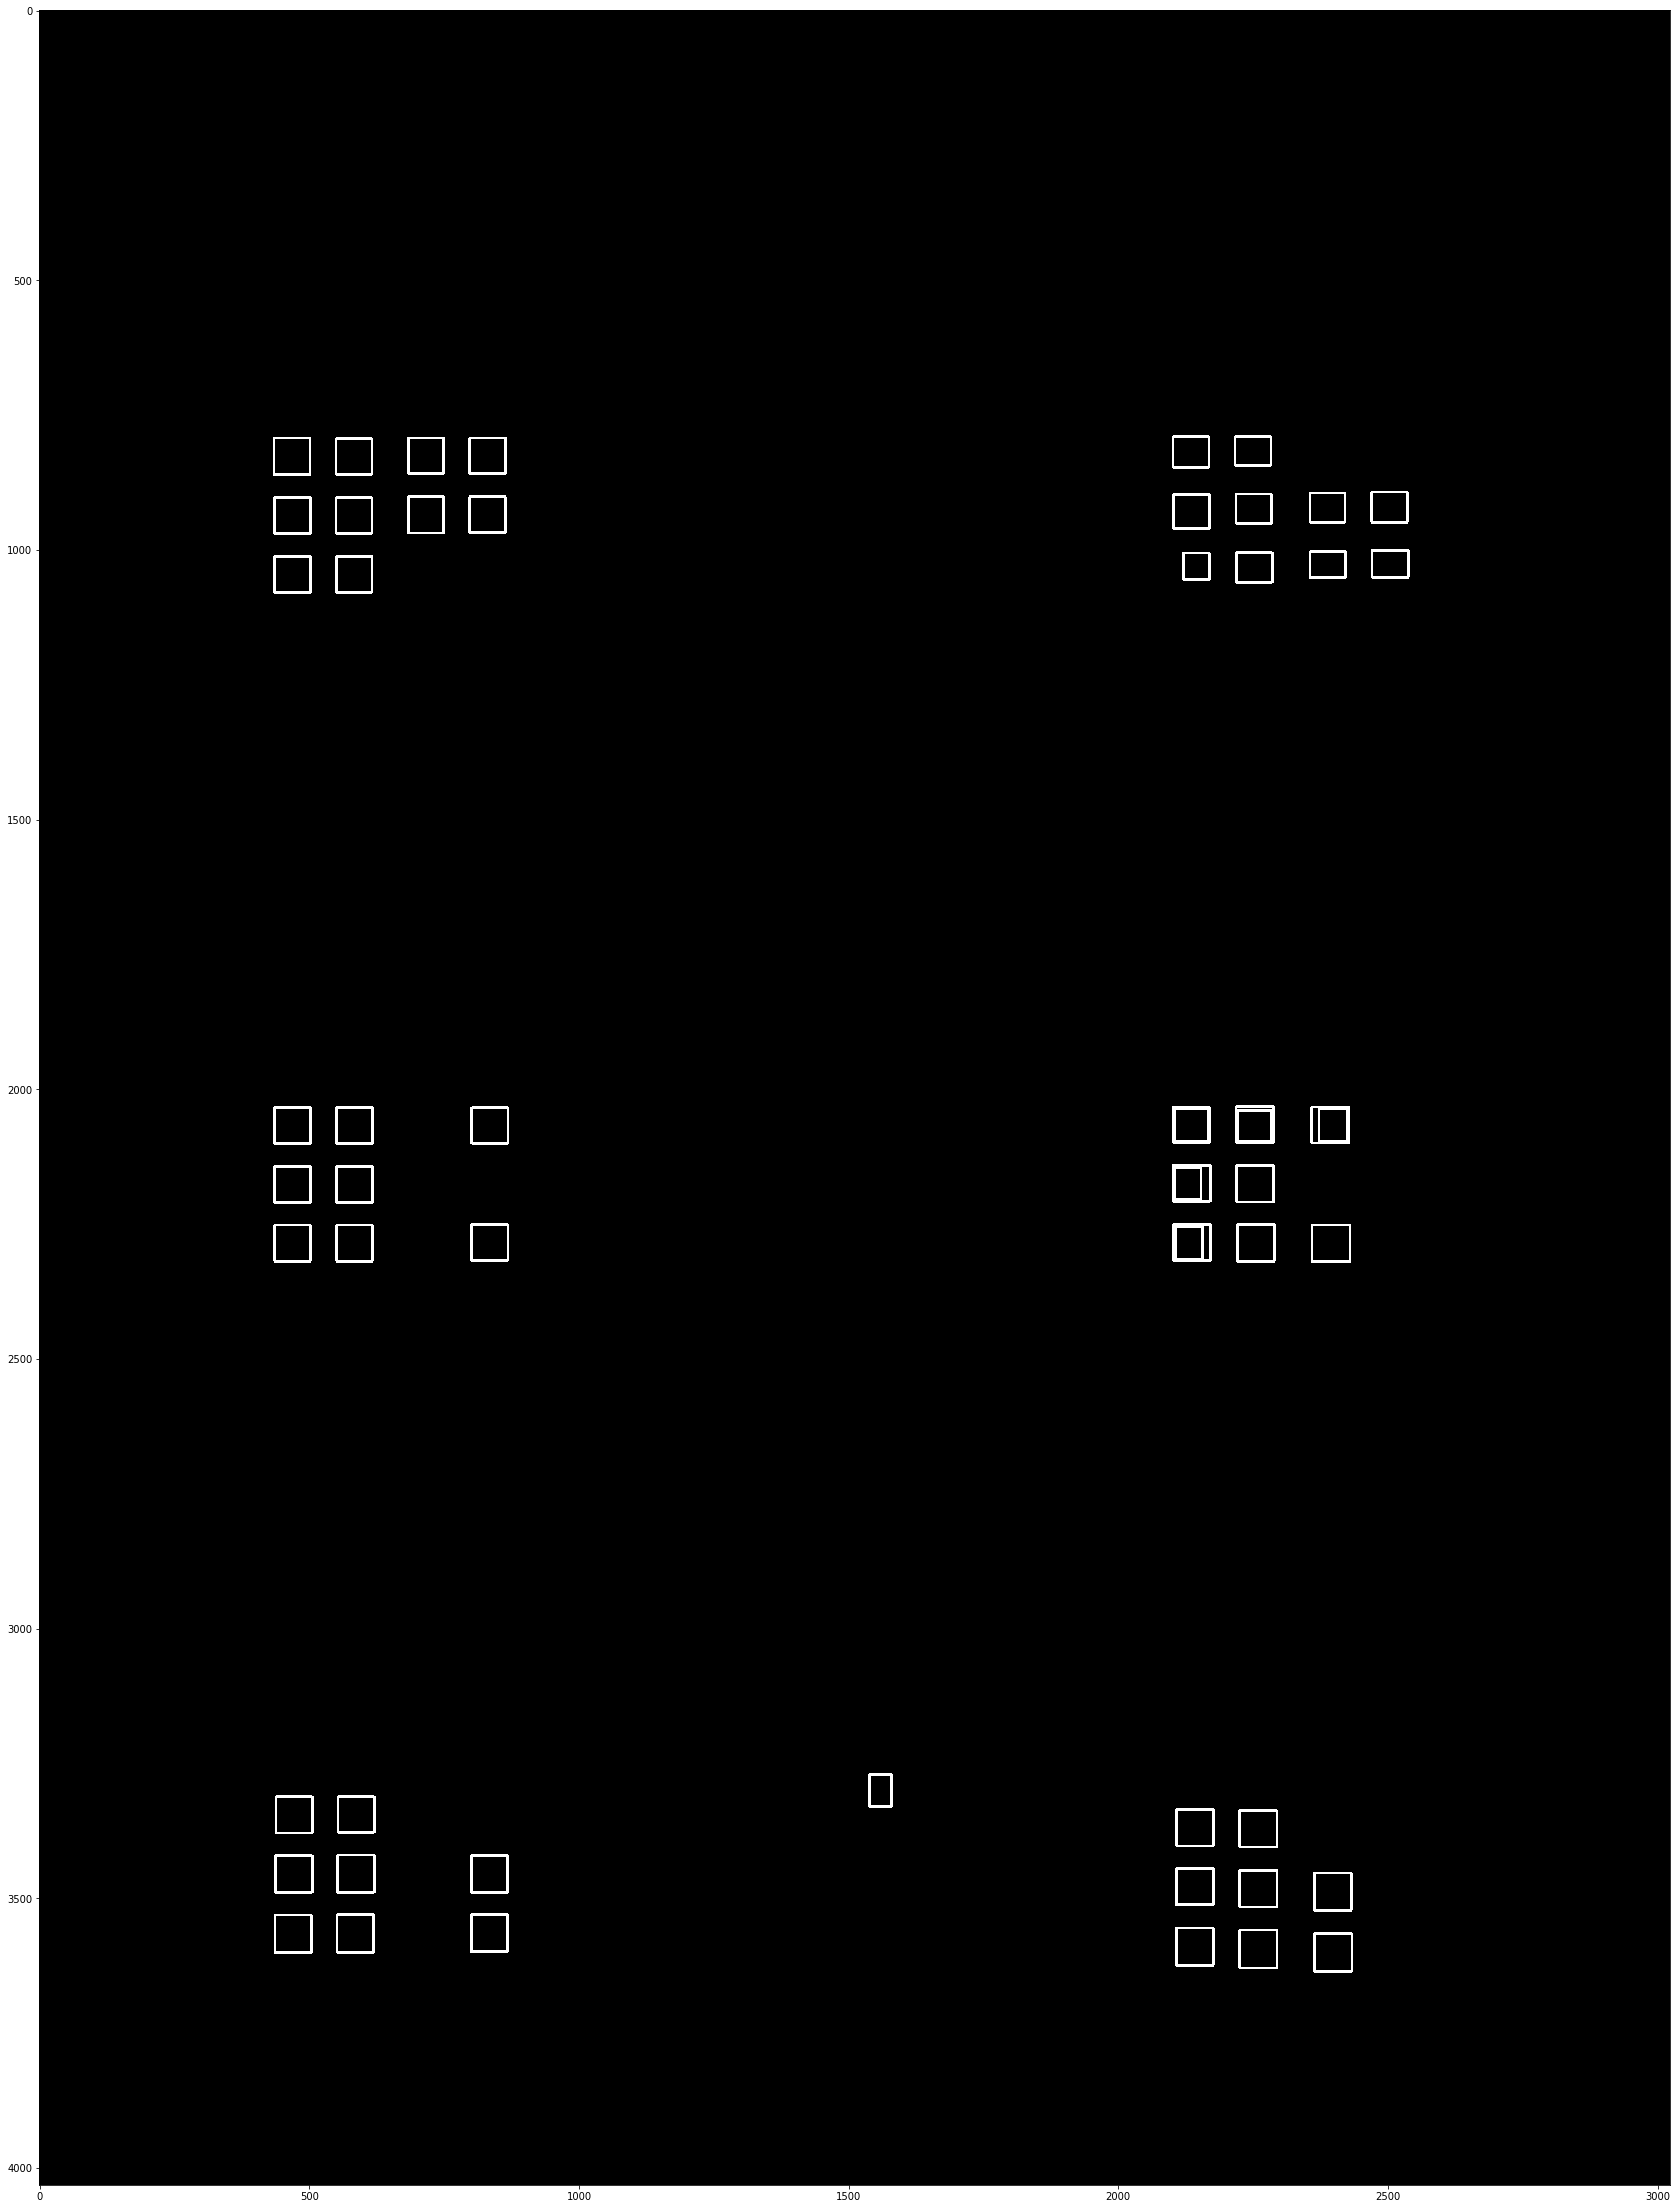

In [8]:
MIN_HEIGHT = 30
MIN_WIDTH = 30
MAX_HEIGHT = 80
MAX_WIDTH = 80
MIN_AREA = 2000
img1_possible_contours = []

cnt=0
for d in img1_contours_dict:
    area = d['w']*d['h']
    
    if MIN_HEIGHT< d['h'] < MAX_HEIGHT \
    and MIN_WIDTH< d['w'] < MAX_WIDTH \
    and MIN_AREA<area:
        d['idx'] = cnt
        cnt += 1
        img1_possible_contours.append(d)
        
img1_temp_result = np.zeros((height, width, channel),dtype = np.uint8)

for d in img1_possible_contours:
    cv2.rectangle(img1_temp_result, pt1=(d['x'],d['y']),pt2 = (d['x']+d['w'], d['y']+d['h']), color = (255,255,255), thickness=4)
    
plt.figure(figsize=(48,40))
plt.imshow(img1_temp_result, cmap='gray')
cv2.imwrite('3_unprocessed.jpg',img1_temp_result)

In [9]:
unmatched1_result_idx = []
for d1 in img1_possible_contours:     
    if d1['idx'] in unmatched1_result_idx:
        continue
    for d2 in img1_possible_contours:
        if d1['idx'] == d2['idx']:
            continue
                
        dx = abs(d1['cx'] - d2['cx'])
        dy = abs(d1['cy'] - d2['cy'])
            
        distance = np.linalg.norm(np.array([d1['cx'],d1['cy']]) - np.array([d2['cx'], d2['cy']]))
            
        if distance<15:
                unmatched1_result_idx.append(d2['idx'])
        else:
            continue
    
matched1_result_idx=[]
for d4 in img1_possible_contours:
    if d4['idx'] not in unmatched1_result_idx:
        matched1_result_idx.append(d4['idx'])
print(matched1_result_idx)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]


In [10]:
matched1_result = []
for idx_list in matched1_result_idx:
    matched1_result.append(np.take(img1_possible_contours, idx_list))

True

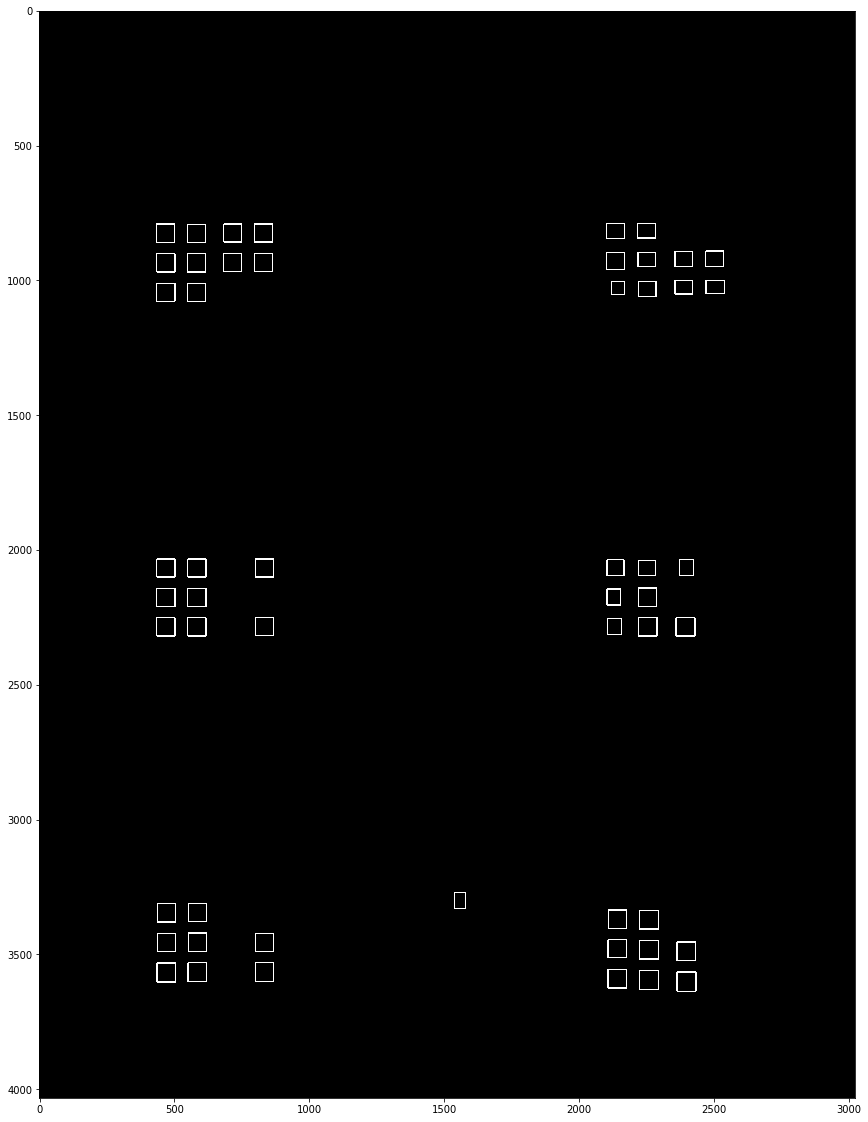

In [11]:
temp_result = np.zeros((height, width, channel), dtype = np.uint8)

for d in matched1_result:
    cv2.rectangle(temp_result, pt1=(d['x'],d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255,255,255), thickness=4)
        
plt.figure(figsize=(24,20))
plt.imshow(temp_result, cmap='gray')
cv2.imwrite('3_processing.jpg',temp_result)

In [12]:
unmatched2_result_idx = []
for d1 in matched1_result:
    check = 0
    for d2 in matched1_result:
        if d1['idx'] == d2['idx']:
            continue
                
        distance = np.linalg.norm(np.array([d1['cx'],d1['cy']]) - np.array([d2['cx'], d2['cy']]))
        if distance<400:
            check += 1
        else:
            continue
    if check < 3:
        unmatched2_result_idx.append(d1['idx'])
print(unmatched2_result_idx)
    
matched2_result_idx=[]
for d4 in matched1_result_idx:
    if d4 not in unmatched2_result_idx:
        matched2_result_idx.append(d4)

[16]


In [13]:
matched2_result_idx=[]
for d4 in matched1_result:
    if d4['idx'] not in unmatched2_result_idx:
        matched2_result_idx.append(d4['idx'])
print(matched2_result_idx)

matched2_result = []
for idx_list in matched2_result_idx:
    matched2_result.append(np.take(img1_possible_contours, idx_list))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]


True

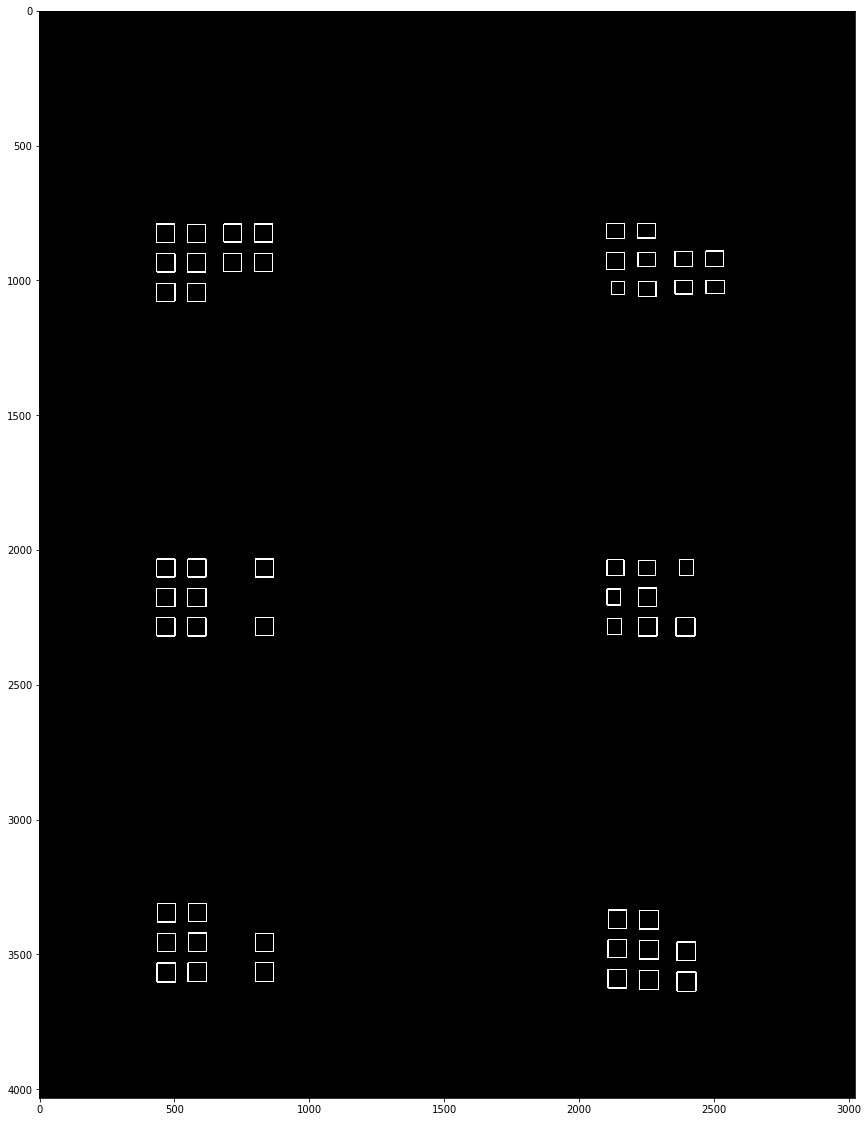

In [14]:
temp_result = np.zeros((height, width, channel), dtype = np.uint8)

for d in matched2_result:
    cv2.rectangle(temp_result, pt1=(d['x'],d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255,255,255), thickness=4)
        
plt.figure(figsize=(24,20))
plt.imshow(temp_result, cmap='gray')
cv2.imwrite('3_processed.jpg',temp_result)

In [15]:
img1_possible_contours = matched2_result

In [16]:
cx_list = []
cy_list = []
w_list = []
for i in img1_possible_contours:
    cx =i['cx']
    cy =i['cy']
    w = i['w']
    cx_list.append(cx)
    cy_list.append(cy)
    w_list.append(w)
avg = sum(w_list,0.0)/len(w_list)

Large_cx_list=[]
Small_cx_list=[]

for i in cx_list:
    if i>1500:
        Large_cx_list.append(i)
    elif i <= 1500:
        Small_cx_list.append(i)
Large_cy_list = []
Medium_cy_list = []
Small_cy_list = []
for j in cy_list:
    if j<1400:
        Small_cy_list.append(j)
    elif 1400 <= j <= 2800:
        Medium_cy_list.append(j)
    elif 2800< j:
        Large_cy_list.append(j) 
print(Small_cy_list)

[1045.5, 1045.5, 1030.5, 1033.0, 1027.5, 1026.0, 936.5, 936.5, 935.0, 935.5, 929.5, 924.0, 922.0, 921.0, 827.0, 826.0, 826.0, 827.0, 817.0, 818.5]


True

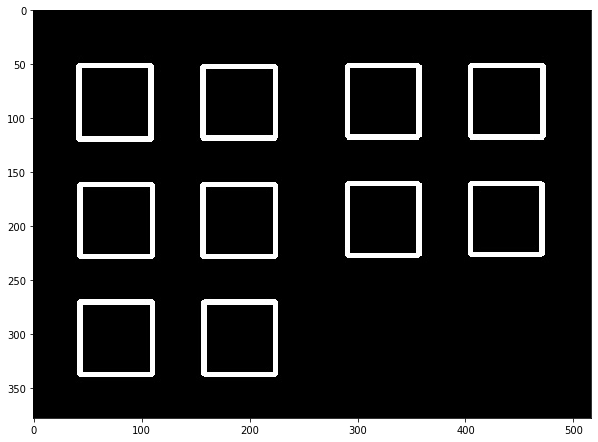

In [17]:
im = cv2.imread("3_processed.jpg")
max_Large_cx_list = int(max(Large_cx_list))
min_Large_cx_list = int(min(Large_cx_list))
max_Small_cx_list = int(max(Small_cx_list))
min_Small_cx_list = int(min(Small_cx_list))
max_Large_cy_list = int(max(Large_cy_list))
min_Large_cy_list = int(min(Large_cy_list))
max_Medium_cy_list = int(max(Medium_cy_list))
min_Medium_cy_list = int(min(Medium_cy_list))
max_Small_cy_list = int(max(Small_cy_list))
min_Small_cy_list = int(min(Small_cy_list))
w_mean = int(sum(w_list,0.0)/len(w_list))

roi1 = im[min_Small_cy_list-w_mean-10:max_Small_cy_list+w_mean+10,  
          min_Small_cx_list-w_mean-10:max_Small_cx_list+w_mean+10] #초성 ㅇ
roi2 = im[min_Small_cy_list-w_mean-10:max_Small_cy_list+w_mean+10,  
          min_Large_cx_list-w_mean-10:max_Large_cx_list+w_mean+10] #종성 ㅇ
roi3 = im[min_Medium_cy_list-w_mean-10:max_Medium_cy_list+w_mean+10,  
          min_Small_cx_list-w_mean-10:max_Small_cx_list+w_mean+10] #초성 ㅈ
roi4 = im[min_Medium_cy_list-w_mean-10:max_Medium_cy_list+w_mean+10,  
          min_Large_cx_list-w_mean-10:max_Large_cx_list+w_mean+10] #종성 ㅈ
roi5 = im[min_Large_cy_list-w_mean-10:max_Large_cy_list+w_mean+10,  
          min_Small_cx_list-w_mean-10:max_Small_cx_list+w_mean+10] #초성 ㅊ
roi6 = im[min_Large_cy_list-w_mean-10:max_Large_cy_list+w_mean+10,  
          min_Large_cx_list-w_mean-10:max_Large_cx_list+w_mean+10] #종성 ㅊ
plt.figure(figsize=(10,10))
plt.imshow(roi1)
cv2.imwrite('CD.jpg', roi1)
cv2.imwrite('JD.jpg', roi2)
cv2.imwrite('CW.jpg', roi3)
cv2.imwrite('JW.jpg', roi4)
cv2.imwrite('CC.jpg', roi5)
cv2.imwrite('JC.jpg', roi6)